<a href="https://colab.research.google.com/github/MdSyfulIslam/CSE-412-Machine-Learning-Lab/blob/main/222002111_Syful_Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#222002111, Md Syful Islam, CSE 412, 222-D3.

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [5]:
df = pd.read_csv('/content/diabetes.csv')
print("First 10 rows:")
print(df.head(10))

First 10 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3               

In [6]:
print("Dataset shape:", df.shape)
print("\nMissing values per column:")
print(df.isna().sum())

Dataset shape: (768, 9)

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 768
Number of columns: 9


In [10]:
print("\nTarget variable:")
display(df['Outcome'])


Target variable:


,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [20]:
cols_with_zeros_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros_as_missing:
    df[col] = df[col].replace(0, np.nan)
print("DataFrame after replacing 0s with NaN:")
print(df.head())
print("\nMissing values after replacement:")
print(df.isna().sum())

DataFrame after replacing 0s with NaN:
   Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin   BMI  \
0            6    148.0           72.0       35.00000  1.029839  33.6   
1            1     85.0           66.0       29.00000  1.029839  26.6   
2            8    183.0           64.0       29.15342  1.029839  23.3   
3            1     89.0           66.0       23.00000  0.998606  28.1   
4            0    137.0           40.0       35.00000  1.034315  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values after replacement:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age          

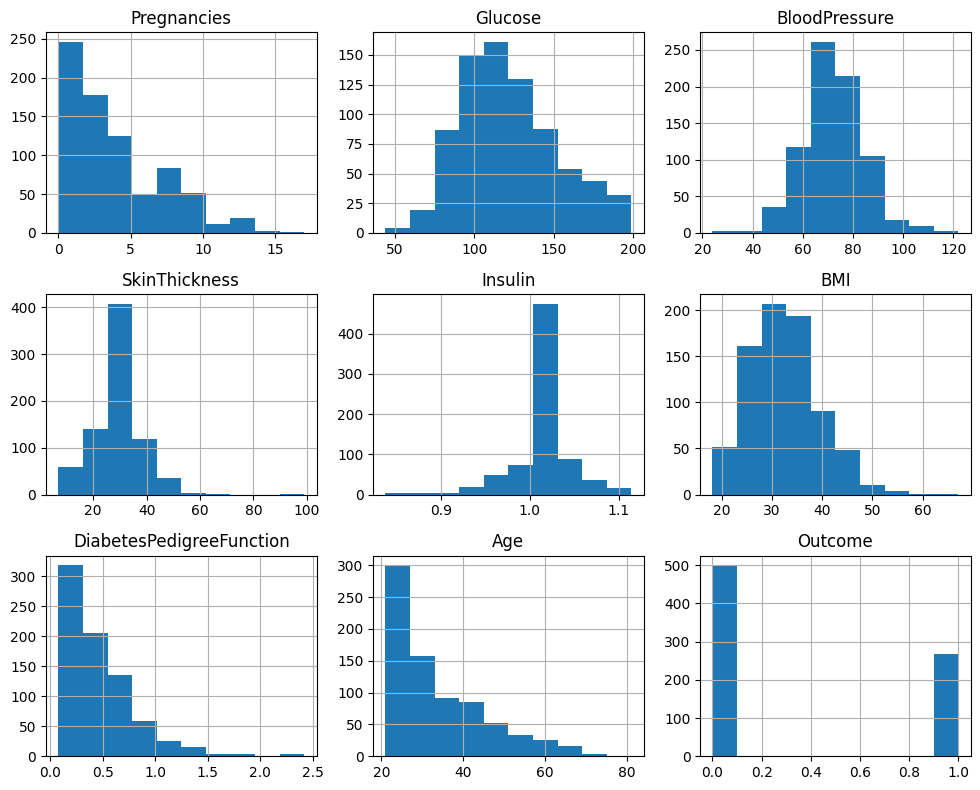

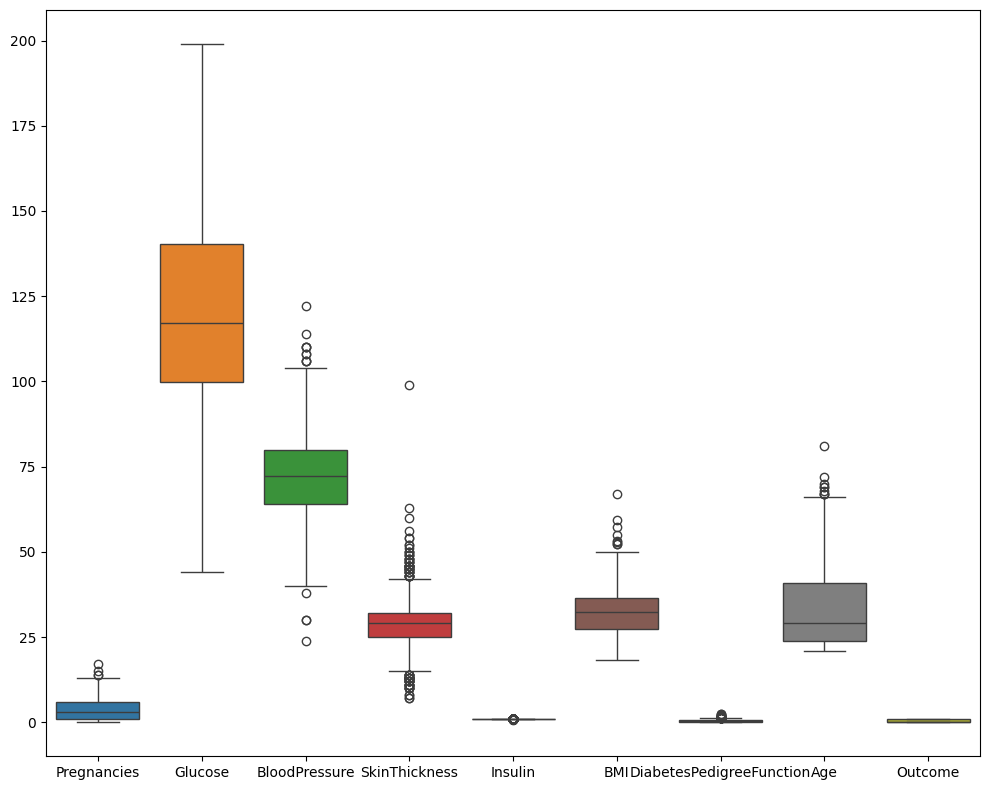

In [21]:
import seaborn as sns

#histograms
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# boxplots
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.tight_layout()
plt.show()

In [22]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (576, 8)
X_test shape: (192, 8)
y_train shape: (576,)
y_test shape: (192,)


In [23]:
numerical_features = X.columns


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("X_train_processed shape:", X_train_processed.shape)
print("X_test_processed shape:", X_test_processed.shape)

X_train_processed shape: (576, 8)
X_test_processed shape: (192, 8)


In [24]:
model = LogisticRegression(random_state=42)
model.fit(X_train_processed, y_train)


y_pred = model.predict(X_test_processed)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

Accuracy: 0.734375

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       123
           1       0.64      0.61      0.62        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192


Confusion Matrix:
 [[99 24]
 [27 42]]
